In [56]:
import pandas as pd
df=pd.read_csv("gme_tweets.csv")

In [57]:
li=list(df["tweet"].values)

In [58]:
li1=li[:3]+li[23:25]+li[40:45]+li[46:50]

In [59]:
li1.__len__()

14

In [60]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stop_li=stopwords.words('english')
li2=[]
for i in range(len(li1)):   
    x=re.sub('#\S+',' ',li1[i])
    x=re.sub('@\S+',' ',x)
    x=re.sub('\S+@\S+',' ',x)
    x=re.sub('http\S+',' ',x)
    x=re.sub('[^A-Za-z]',' ',x)
    x=re.sub('\d+',' ',x)
    li=[]
    for l in x.lower().split():
        if l.isalpha()==True:
            li.append(l)
    str2=""
    for l in li:
        if l not in stop_li:
                str2+=l+" "
    str_temp = word_tokenize(str2.lower())
    str3=""
    for k in str_temp:
        
        str3+=lemmatizer.lemmatize(k)+" "
        
    li2.append(str3)

In [61]:
li2=li2[:10]

In [79]:
li2

['reddit beat wall street gamestop squeeze ',
 'would ignore nbc abc ny time ap news reuters bbc new yorker huffington newsweek time guardian cbc wall street journal forbes usa today politico think learn stupid ',
 'obvious underrated point two way street leftist waste time swamp dwelling border wall enthusiast ',
 'reason student college loan debt first place massive devastating trillion dollar morally criminal conspiracy committed wall street banksters libertarian billionaire reaganomics devotee quick read ',
 'ronbama like mosque iran calling people islamophobes occupying wall street ',
 'wall street clearly great week shorting gme well didnt advice stick cricket market come rip life saving hand year time ',
 'wrong wall street need watch og ',
 'stance criminal justice health care income inequality etc connection corporate interest wall street etc also moderate believe dems hamstrung pretend come making progress help vulnerable people ',
 'bb mentioned stock wall street bet gme gue

In [62]:
str=" ".join(li2)
li=str.split()
li_unique=set(li)

In [63]:
li_unique

{'abc',
 'advice',
 'age',
 'also',
 'ap',
 'banksters',
 'bb',
 'bbc',
 'beat',
 'believe',
 'bet',
 'billionaire',
 'border',
 'calling',
 'care',
 'cbc',
 'challenge',
 'clearly',
 'college',
 'come',
 'committed',
 'connection',
 'conspiracy',
 'corporate',
 'cricket',
 'criminal',
 'debt',
 'dems',
 'designed',
 'devastating',
 'devotee',
 'dial',
 'didnt',
 'dollar',
 'dwelling',
 'enthusiast',
 'etc',
 'exercise',
 'first',
 'fitness',
 'forbes',
 'gamestop',
 'gme',
 'gon',
 'great',
 'guardian',
 'guess',
 'hamstrung',
 'hand',
 'health',
 'healthy',
 'help',
 'huffington',
 'ignore',
 'income',
 'inequality',
 'interest',
 'iran',
 'islamophobes',
 'join',
 'journal',
 'justice',
 'learn',
 'leftist',
 'level',
 'libertarian',
 'life',
 'like',
 'load',
 'loan',
 'making',
 'market',
 'massive',
 'mentioned',
 'moderate',
 'morally',
 'mosque',
 'na',
 'nbc',
 'need',
 'new',
 'news',
 'newsweek',
 'next',
 'notch',
 'ny',
 'obvious',
 'occupying',
 'og',
 'people',
 'place',

In [64]:
corpus=[]
for i in li_unique:
    corpus.append([i,li.count(i)])

In [65]:
corpus.sort(key=lambda x:x[1],reverse=True)

In [66]:
corpus=corpus[:20]

In [67]:
corpus

[['street', 10],
 ['wall', 10],
 ['time', 4],
 ['people', 3],
 ['bb', 3],
 ['week', 3],
 ['fitness', 3],
 ['gme', 2],
 ['etc', 2],
 ['criminal', 2],
 ['first', 2],
 ['next', 2],
 ['journal', 2],
 ['come', 2],
 ['corporate', 1],
 ['leftist', 1],
 ['devotee', 1],
 ['didnt', 1],
 ['forbes', 1],
 ['committed', 1]]

In [68]:
import numpy as np
li_tweets=['tweet1','tweet2','tweet3','tweet4','tweet5','tweet6','tweet7','tweet8','tweet9','tweet10']
df=pd.DataFrame([["" for x in range(10)] for y in range(20)] ,columns=li_tweets)


In [69]:
df.index=[x[0] for x in corpus]

In [70]:
df

,tweet1,tweet2,tweet3,tweet4,tweet5,tweet6,tweet7,tweet8,tweet9,tweet10
street,,,,,,,,,,
wall,,,,,,,,,,
time,,,,,,,,,,
people,,,,,,,,,,
bb,,,,,,,,,,
week,,,,,,,,,,
fitness,,,,,,,,,,
gme,,,,,,,,,,
etc,,,,,,,,,,
criminal,,,,,,,,,,


In [72]:
for i in range(20):
    for j in range(10):
        if corpus[i][0] in li2[j]:
            df.loc[corpus[i][0],li_tweets[j]]="X"
        else:
            df.loc[corpus[i][0],li_tweets[j]]=""

In [73]:
df

,tweet1,tweet2,tweet3,tweet4,tweet5,tweet6,tweet7,tweet8,tweet9,tweet10
street,X,X,X,X,X,X,X,X,X,X
wall,X,X,X,X,X,X,X,X,X,X
time,,X,X,,,X,,,,
people,,,,,X,,,X,,X
bb,,X,,,,,,,X,
week,,X,,,,X,,,X,X
fitness,,,,,,,,,,X
gme,,,,,,X,,,X,
etc,,,,,,,,X,,
criminal,,,,X,,,,X,,


In [74]:
df.to_csv("lab10.csv")

In [75]:
from concepts import Context,load_csv

In [76]:
context=load_csv("lab10.csv")

In [77]:
print(context)

<Context object mapping 20 objects to 10 properties [7502873c] at 0x221aff7cca0>
             |tweet1|tweet2|tweet3|tweet4|tweet5|tweet6|tweet7|tweet8|tweet9|tweet10|
    street   |X     |X     |X     |X     |X     |X     |X     |X     |X     |X      |
    wall     |X     |X     |X     |X     |X     |X     |X     |X     |X     |X      |
    time     |      |X     |X     |      |      |X     |      |      |      |       |
    people   |      |      |      |      |X     |      |      |X     |      |X      |
    bb       |      |X     |      |      |      |      |      |      |X     |       |
    week     |      |X     |      |      |      |X     |      |      |X     |X      |
    fitness  |      |      |      |      |      |      |      |      |      |X      |
    gme      |      |      |      |      |      |X     |      |      |X     |       |
    etc      |      |      |      |      |      |      |      |X     |      |       |
    criminal |      |      |      |X     |      |      |   

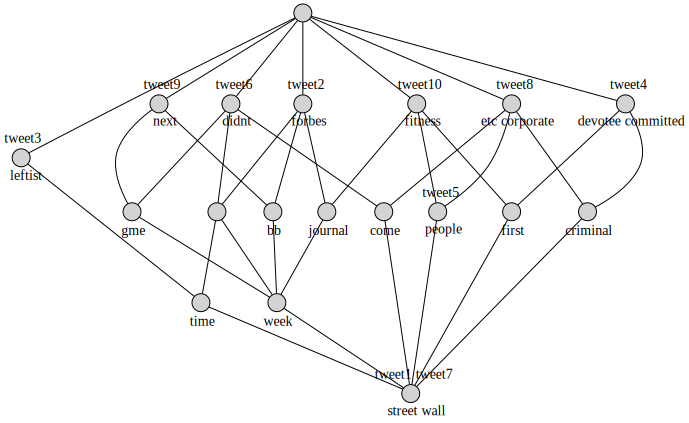

In [78]:
context.lattice.graphviz()